# This Notebook is for simulation results figure 1 to 2

In [1]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
from typing import Dict, List, Tuple
import time

# Add 'src' directory to the system path
sys.path.append('../src')

from utils.channel import ChannelModel
from utils.signal import SignalProcessor

from environment.uav import UAV
from environment.users import GroundUser



# Set random seed for reproducibility
np.random.seed(42)

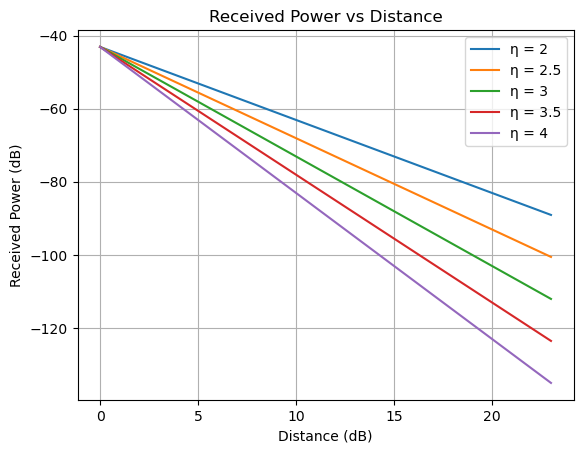

In [2]:
def test_figure_1():
    etas = [2, 2.5, 3, 3.5, 4]
    distance = np.linspace(1, 200, 100)
    distance_db = 10 * np.log10(distance)
    Pt = 0.5 # W
    # initialise empty list for received power
    Pr_db = [[] for _ in range(len(etas))] 

    for i, eta in enumerate(etas):
        channel_model = ChannelModel(
            frequency=2.4e9,  # 2.4 GHz
            path_loss_exponent=eta,
            noise_power=-100.0,  # dB
            seed=42
        )
        for j, d in enumerate(distance):
            h = channel_model.calculate_channel_coefficient_distance(d)
            Pr = Pt * (abs(h)**2)
            Pr_db[i].append(10 * np.log10(Pr)) 
    
    # Plot each eta curve
    for i, eta in enumerate(etas):
        plt.plot(distance_db, Pr_db[i], label=f'η = {eta}')
    
    plt.xlabel('Distance (dB)')
    plt.ylabel('Received Power (dB)')
    plt.title('Received Power vs Distance')
    plt.legend()
    plt.grid(True)
    plt.show()

test_figure_1()

From the figure 1, we can know that 

Calculating received signal power for different path loss exponents...
Eta values: [2, 2.5, 3, 3.5, 4]
Environment bounds: (100, 100, 50)
Grid size: (7, 7) (about 49 users)
UAV position: (0, 0, 50)

  Calculating for η = 2...
    Distance range: 50.5 - 143.4 m
    Power range: -86.2 - -77.1 dB
    Number of users: 49

  Calculating for η = 2.5...
    Distance range: 50.5 - 143.4 m
    Power range: -97.0 - -85.6 dB
    Number of users: 49

  Calculating for η = 3...
    Distance range: 50.5 - 143.4 m
    Power range: -107.7 - -94.2 dB
    Number of users: 49

  Calculating for η = 3.5...
    Distance range: 50.5 - 143.4 m
    Power range: -118.5 - -102.7 dB
    Number of users: 49

  Calculating for η = 4...
    Distance range: 50.5 - 143.4 m
    Power range: -129.3 - -111.2 dB
    Number of users: 49

All eta values processed. Plotting combined figure...


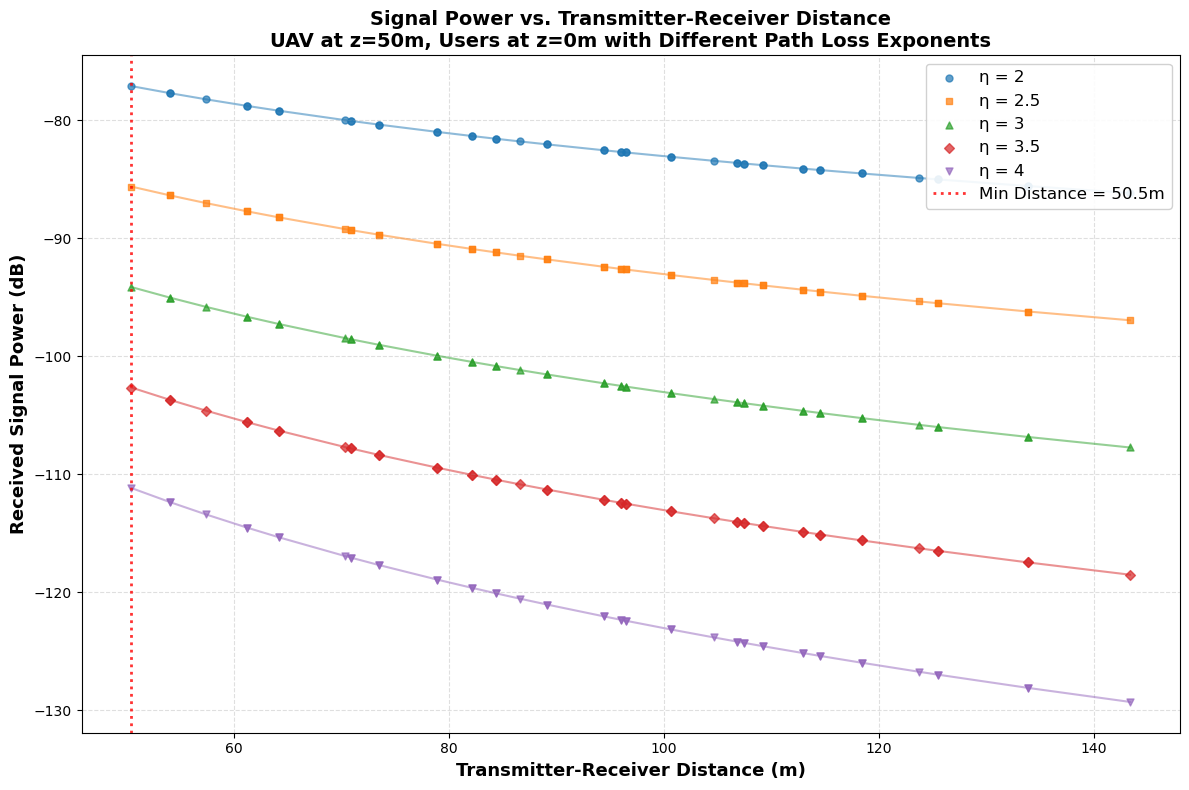

Plotting complete!


<Figure size 640x480 with 0 Axes>

In [3]:
def plot_signal_power_with_grid_users(
    eta=2, env_bounds=(100, 100, 50), grid_size=(7, 7),
    uav_position=(0, 0, 50), transmit_power=0.5, frequency=2.4e9, save_path=None):
    uav = UAV(start_position=uav_position, transmit_power=transmit_power, env_bounds=env_bounds)
    x = np.linspace(5, env_bounds[0]-5, grid_size[0])
    y = np.linspace(5, env_bounds[1]-5, grid_size[1])
    user_positions = [[xi, yi, 0] for xi in x for yi in y]
    distances = np.array([uav.distance_to(np.array(pos)) for pos in user_positions])
    channel_model = ChannelModel(frequency=frequency, path_loss_exponent=eta, noise_power=-100.0)
    received_powers, snr_values = [], []
    for pos in user_positions:
        coeff = channel_model.calculate_channel_coefficient(uav.get_position(), np.array(pos))
        snr = channel_model.calculate_snr(coeff, transmit_power)
        snr_values.append(snr)
        received_powers.append(transmit_power * (np.abs(coeff) ** 2))
    received_powers = np.array(received_powers)
    snr_values = np.array(snr_values)
    results = {
        'user_positions': user_positions,
        'distances': distances,
        'eta_results': {
            eta: {
                'received_powers_db': 10 * np.log10(received_powers + 1e-20),
                'snr_db': 10 * np.log10(snr_values + 1e-20),
                'received_powers_linear': received_powers,
                'snr_linear': snr_values
            }
        }
    }
    return results

def plot_6_1(all_results):
    plt.figure(figsize=(12, 8))
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
    markers = ['o', 's', '^', 'D', 'v']
    for i, eta in enumerate(sorted(all_results)):
        res = all_results[eta]
        d = res['distances']
        p_db = res['eta_results'][eta]['received_powers_db']
        plt.scatter(d, p_db, color=colors[i % len(colors)], marker=markers[i % len(markers)], s=25, alpha=0.7, label=f'η = {eta}')
        idx = np.argsort(d)
        plt.plot(d[idx], p_db[idx], color=colors[i % len(colors)], alpha=0.5, linewidth=1.5)
    plt.xlabel('Transmitter-Receiver Distance (m)', fontsize=13, fontweight='bold')
    plt.ylabel('Received Signal Power (dB)', fontsize=13, fontweight='bold')
    plt.title('Signal Power vs. Transmitter-Receiver Distance\nUAV at z=50m, Users at z=0m with Different Path Loss Exponents', fontsize=14, fontweight='bold')
    plt.grid(True, alpha=0.4, linestyle='--')
    all_distances = np.concatenate([r['distances'] for r in all_results.values()])
    min_distance = np.min(all_distances)
    plt.axvline(x=min_distance, color='red', linestyle=':', linewidth=2, alpha=0.8, label=f'Min Distance = {min_distance:.1f}m')
    plt.legend(fontsize=12, loc='upper right', framealpha=0.9)
    plt.tight_layout()
    plt.show()

    return plt.gcf()

def test_figure_1():
    eta_values = [2, 2.5, 3, 3.5, 4]
    env_bounds = (100, 100, 50)
    grid_size = (7, 7)
    uav_position = (0, 0, 50)
    transmit_power = 0.5
    frequency = 2.4e9
    print(f"Calculating received signal power for different path loss exponents...\n"
          f"Eta values: {eta_values}\n"
          f"Environment bounds: {env_bounds}\n"
          f"Grid size: {grid_size} (about {grid_size[0]*grid_size[1]} users)\n"
          f"UAV position: {uav_position}\n")
    all_results = {}
    for eta in eta_values:
        print(f"  Calculating for η = {eta}...")
        results = plot_signal_power_with_grid_users(
            eta=eta, env_bounds=env_bounds, grid_size=grid_size,
            uav_position=uav_position, transmit_power=transmit_power, frequency=frequency
        )
        all_results[eta] = results
        d = results['distances']
        p_db = results['eta_results'][eta]['received_powers_db']
        print(f"    Distance range: {d.min():.1f} - {d.max():.1f} m")
        print(f"    Power range: {p_db.min():.1f} - {p_db.max():.1f} dB")
        print(f"    Number of users: {len(results['user_positions'])}\n")
    print("All eta values processed. Plotting combined figure...")
    fig = plot_6_1(all_results)
    print("Plotting complete!")
    return all_results, fig

all_results, figure = test_figure_1()
# Uncomment below for summary statistics
# print("\n=== Summary Statistics ===")
# for eta in sorted(all_results):
#     res = all_results[eta]
#     p_db = res['eta_results'][eta]['received_powers_db']
#     snr_db = res['eta_results'][eta]['snr_db']
#     print(f"η = {eta}:\n  Mean received power: {p_db.mean():.1f} dB\n  Mean SNR: {snr_db.mean():.1f} dB\n  Power std: {p_db.std():.1f} dB")

K=1: First value=-infdB, Last value=-84.61dB
K=2: First value=-infdB, Last value=-85.66dB
K=3: First value=-infdB, Last value=-86.52dB
K=4: First value=-infdB, Last value=-87.24dB


C:\Users\12107\AppData\Local\Temp\ipykernel_31464\1818412223.py:35: RuntimeWarning: divide by zero encountered in log10
  total_received_power.append(10 * np.log10(total_power))


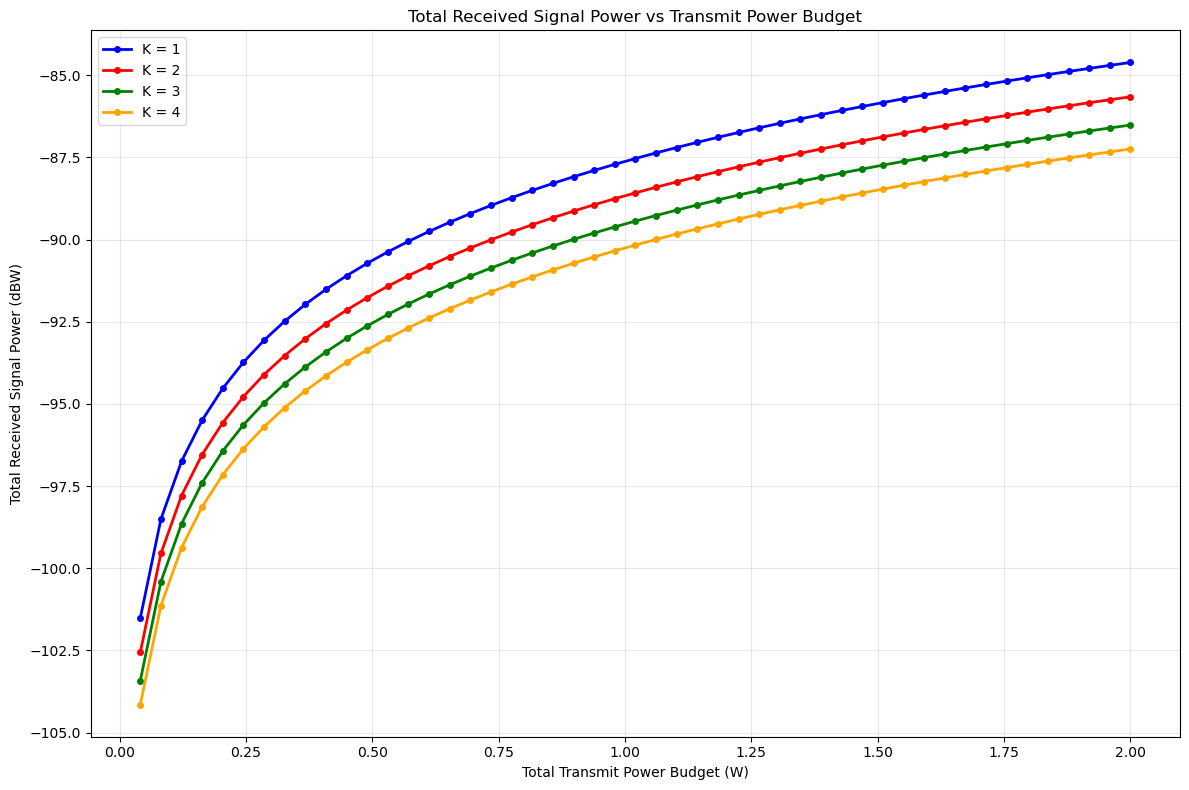

In [7]:
def test_figure_2():
    channel_model = ChannelModel(
        frequency=2.4e9,  # 2.4 GHz
        path_loss_exponent=2.5,
        noise_power=-100.0,  # dB
        seed=42
    )

    K_nums = [1, 2, 3, 4]  # Number of users
    Pt_total = np.linspace(0.0, 2.0, 50)  # Total transmit power budget (W)

    # Set different distances for each user (to simulate different channel conditions)
    user_distances = [80, 100, 120, 140]  # Distances for different users
    # user_distances = [140, 120, 100, 80]

    plt.figure(figsize=(12, 8))
    
    colors = ['blue', 'red', 'green', 'orange']
    
    for idx, K in enumerate(K_nums):
        total_received_power = []
        
        for Pt in Pt_total:
            Pt_per_user = Pt / K
            user_powers = []
            
            for k in range(K):
                # Calculate channel coefficient using different distances
                user_distance = user_distances[k]
                h = channel_model.calculate_channel_coefficient_distance(user_distance)
                received_power = Pt_per_user * (abs(h)**2)
                user_powers.append(received_power)
            
            total_power = sum(user_powers)
            total_received_power.append(10 * np.log10(total_power))
        
        print(f"K={K}: First value={total_received_power[0]:.2f}dB, Last value={total_received_power[-1]:.2f}dB")
        
        plt.plot(Pt_total, total_received_power, 
                label=f'K = {K}', marker='o', markersize=4, color=colors[idx], linewidth=2)
    
    plt.xlabel('Total Transmit Power Budget (W)')
    plt.ylabel('Total Received Signal Power (dBW)')
    plt.title('Total Received Signal Power vs Transmit Power Budget')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

test_figure_2()

K=1: First value=-100.05dB, Last value=-87.04dB
K=2: First value=-100.05dB, Last value=-87.04dB
K=3: First value=-100.05dB, Last value=-87.04dB
K=4: First value=-100.05dB, Last value=-87.04dB


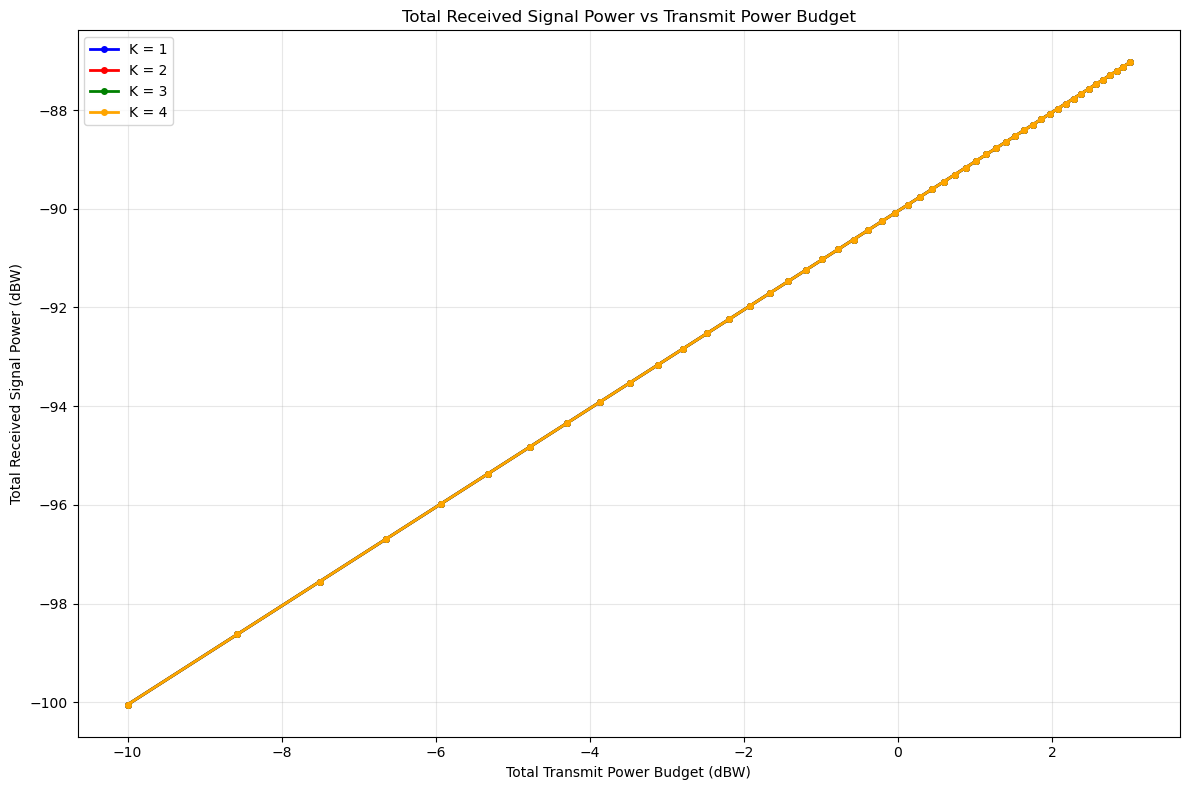

In [5]:
def test_figure_2():
    channel_model = ChannelModel(
        frequency=2.4e9,  # 2.4 GHz
        path_loss_exponent=2.5,
        noise_power=-100.0,  # dB
        seed=42
    )

    K_nums = [1, 2, 3, 4]  # Number of users
    Pt_total = np.linspace(0.1, 2.0, 50)  # Total transmit power budget (W)

    # Set the same distance for all users (simulate identical channel conditions)
    user_distances = [100, 100, 100, 100]  # Distances for different users

    plt.figure(figsize=(12, 8))
    
    colors = ['blue', 'red', 'green', 'orange']
    
    for idx, K in enumerate(K_nums):
        total_received_power = []
        
        for Pt in Pt_total:
            Pt_per_user = Pt / K
            user_powers = []
            
            for k in range(K):
                # Calculate channel coefficient using the distance for each user
                user_distance = user_distances[k]
                h = channel_model.calculate_channel_coefficient_distance(user_distance)
                received_power = Pt_per_user * (abs(h)**2)
                user_powers.append(received_power)
            
            total_power = sum(user_powers)
            total_received_power.append(10 * np.log10(total_power))
        
        print(f"K={K}: First value={total_received_power[0]:.2f}dB, Last value={total_received_power[-1]:.2f}dB")
        
        plt.plot(10 * np.log10(Pt_total), total_received_power, 
                label=f'K = {K}', marker='o', markersize=4, color=colors[idx], linewidth=2)
    
    plt.xlabel('Total Transmit Power Budget (dBW)')
    plt.ylabel('Total Received Signal Power (dBW)')
    plt.title('Total Received Signal Power vs Transmit Power Budget')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

test_figure_2()

K=1: First value=-100.05dB, Last value=-87.04dB
K=2: First value=-103.06dB, Last value=-90.05dB
K=3: First value=-104.82dB, Last value=-91.81dB
K=4: First value=-106.07dB, Last value=-93.06dB


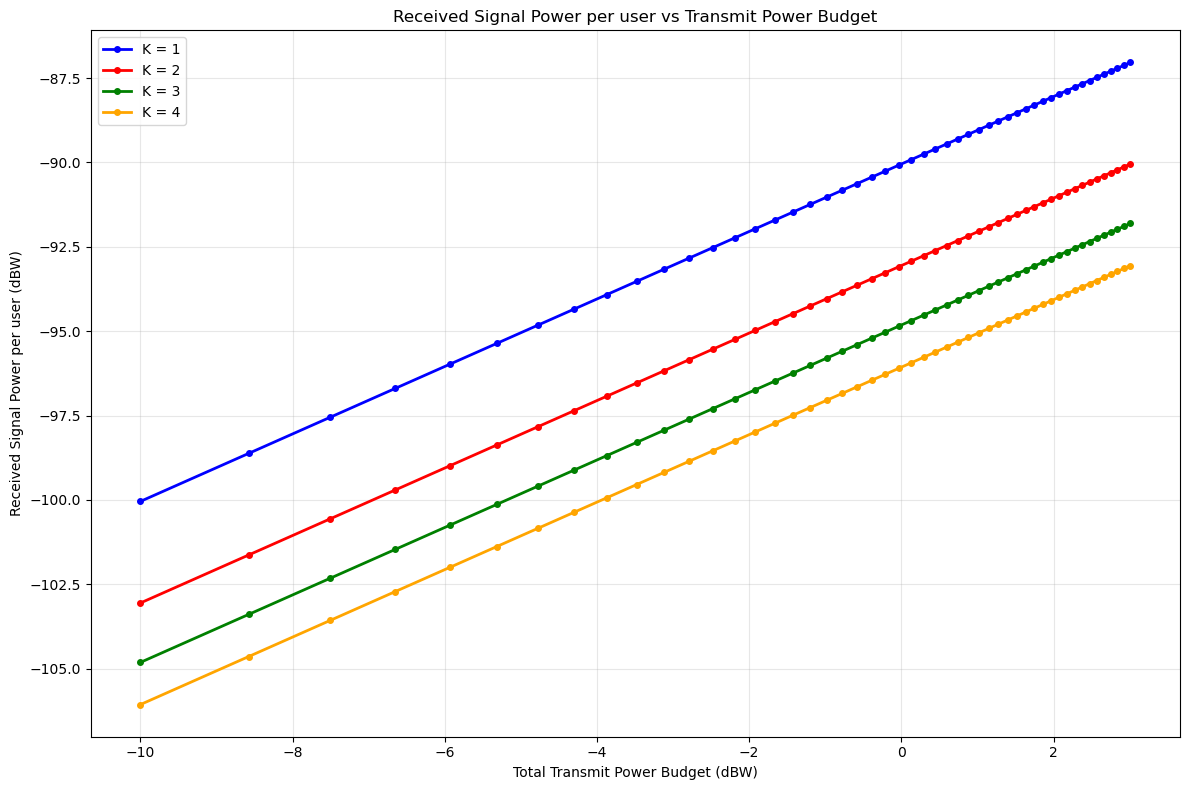

In [ ]:
def test_figure_2():
    channel_model = ChannelModel(
        frequency=2.4e9,  # 2.4 GHz
        path_loss_exponent=2.5,
        noise_power=-100.0,  # dB
        seed=42
    )

    K_nums = [1, 2, 3, 4]  # Number of users
    Pt_total = np.linspace(0.1, 2.0, 50)  # Total transmit power budget (W)

    # Set the same distance for all users (simulate identical channel conditions)
    user_distances = [100, 100, 100, 100]  # Distances for different users

    plt.figure(figsize=(12, 8))
    
    colors = ['blue', 'red', 'green', 'orange']
    
    for idx, K in enumerate(K_nums):
        total_received_power = []
        
        for Pt in Pt_total:
            Pt_per_user = Pt / K
            user_powers = []
            
            for k in range(K):
                # Calculate channel coefficient using the distance for each user
                user_distance = user_distances[k]
                h = channel_model.calculate_channel_coefficient_distance(user_distance)
                received_power = Pt_per_user * (abs(h)**2)
                user_powers.append(received_power)
            
            total_power = sum(user_powers)/K
            total_received_power.append(10 * np.log10(total_power))
        
        print(f"K={K}: First value={total_received_power[0]:.2f}dB, Last value={total_received_power[-1]:.2f}dB")
        
        plt.plot(10 * np.log10(Pt_total), total_received_power, 
                label=f'K = {K}', marker='o', markersize=4, color=colors[idx], linewidth=2)
    
    plt.xlabel('Total Transmit Power Budget (dBW)')
    plt.ylabel('Received Signal Power per user (dBW)')
    plt.title('Received Signal Power per user vs Transmit Power Budget')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

test_figure_2()